In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout

Using TensorFlow backend.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [4]:
dataset = pd.read_csv("../data/gesture7.txt")

In [5]:
dataset.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,gesture
0,0.41,0.48,0.01,0.22,1.00,0.28,0.12,0.30,0.07,0.14,0.00,0.06,0.22,0.09,0.32,0.08,3
1,0.13,0.18,0.08,0.13,0.52,0.32,0.52,0.26,0.12,0.02,0.07,0.00,1.00,0.34,0.39,0.21,3
2,0.02,0.04,0.00,0.59,0.31,0.07,0.48,0.56,0.10,1.00,0.20,0.04,0.85,0.01,0.61,0.47,3
3,0.22,0.53,0.00,0.53,0.46,0.02,0.87,0.01,0.28,0.50,0.20,0.24,1.00,0.05,0.20,0.18,3
4,0.46,0.58,0.28,0.08,0.48,0.31,1.00,0.89,0.01,0.13,0.06,0.04,0.80,0.70,0.58,0.86,3


In [6]:
dataset = dataset.dropna()

In [7]:
dataset_train = np.array(dataset)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [8]:
X_train

array([[0.21, 0.49, 0.28, ..., 0.15, 0.24, 0.51],
       [0.33, 0.06, 0.31, ..., 0.02, 0.  , 0.11],
       [0.98, 0.21, 0.09, ..., 0.26, 1.  , 0.84],
       ...,
       [0.77, 0.29, 0.07, ..., 0.16, 0.1 , 1.  ],
       [0.08, 0.21, 0.13, ..., 0.07, 0.19, 0.18],
       [0.73, 0.26, 0.  , ..., 0.04, 0.08, 0.04]])

In [9]:
Y_train = [int(i) for i in Y_train]
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]
Y_train.shape

(3713, 7)

In [10]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [11]:
model = Sequential()

model.add(Dense(16, input_shape=(16,)))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Dense(7, activation="softmax"))

In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, Y_train,validation_split=0.25, epochs = 50, batch_size = 8, verbose=2)

Train on 2784 samples, validate on 929 samples
Epoch 1/50
2784/2784 - 1s - loss: 0.3522 - accuracy: 0.8655 - val_loss: 0.2820 - val_accuracy: 0.8764
Epoch 2/50
2784/2784 - 0s - loss: 0.2692 - accuracy: 0.8860 - val_loss: 0.2287 - val_accuracy: 0.9004
Epoch 3/50
2784/2784 - 0s - loss: 0.2485 - accuracy: 0.8922 - val_loss: 0.2138 - val_accuracy: 0.9079
Epoch 4/50
2784/2784 - 0s - loss: 0.2350 - accuracy: 0.8979 - val_loss: 0.2055 - val_accuracy: 0.9123
Epoch 5/50
2784/2784 - 0s - loss: 0.2321 - accuracy: 0.8989 - val_loss: 0.2011 - val_accuracy: 0.9150
Epoch 6/50
2784/2784 - 0s - loss: 0.2251 - accuracy: 0.9034 - val_loss: 0.1999 - val_accuracy: 0.9159
Epoch 7/50
2784/2784 - 0s - loss: 0.2213 - accuracy: 0.9035 - val_loss: 0.1942 - val_accuracy: 0.9170
Epoch 8/50
2784/2784 - 0s - loss: 0.2226 - accuracy: 0.9022 - val_loss: 0.1942 - val_accuracy: 0.9170
Epoch 9/50
2784/2784 - 0s - loss: 0.2193 - accuracy: 0.9035 - val_loss: 0.1910 - val_accuracy: 0.9191
Epoch 10/50
2784/2784 - 0s - loss: 

In [15]:
pd.DataFrame.from_dict(history.history).to_csv('historyarduino7.csv',index=False)

Text(0.5, 1.0, 'Accuracy')

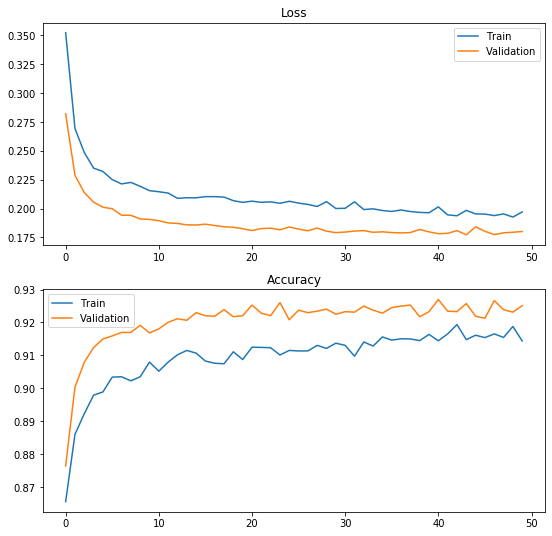

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.title("Accuracy")

In [49]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_22 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 7)                 231       
Total params: 1,047
Trainable params: 1,047
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
model.save("../Data/arduino7gestures.h5")

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model = load_model("../Data/arduino7gestures.h5")

In [53]:
from tinymlgen import port
print(port(model))


#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char model_data[] DATA_ALIGN_ATTRIBUTE = {0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x30, 0x16, 0x00, 0x00, 0x58, 0x11, 0x00, 0x00, 0x40, 0x11, 0x00, 0x00, 0x34, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x78, 0xea, 0xff, 0xff, 0x08, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e, 0x00, 0x0d, 0x00, 0x00, 0x00, 0x00, 0x11, 0x00, 0x00, 0xf8, 0x10,